# Pulse parameters
> @author: Jiheng Duan

## About

This document will tell you how to scan pulse parameters.

### Required Import

**The following thing must be import.**

In the current folder (despite `~\Tutorial\arb_qubit_tutorial\`), the system structure are based on file `~\System\transmon_system.py`. For using arbitrary qubit system structure, please move to the demonstration file under `~\Tutorial\arb_qubit_tutorial\`.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# # This on is a path correcting code, which is used to find the path of qusim.
# sys.path.append('../..')

import qusim.System.transmon_system as qs
# Some useful tools
import qusim.Instruments.tools as tools
# Some intrinsic plotting function
import qusim.DataPlot.plot_lib as pl

# variable name -> string
def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

### Optional import

**The following import are optional**

In [28]:
# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup system

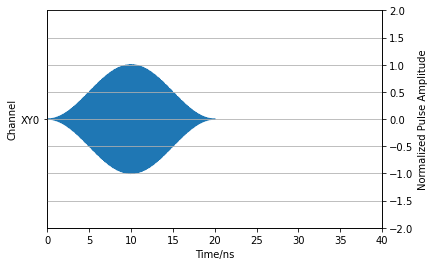

0

In [48]:
N = None
w = [6.3] # Qubit frequency
q_dim = [3 for _ in range(len(w))] # Dimension of each qubit
alpha =[-0.3] # Anharmonicity
r = 0
gamma_list = None

# Set up system class
_system = qs.TransmonSys(N, q_dim, w, alpha, r, gamma_list)

state_0, E_0, index_0 = _system.get_eigenstates_energy((0,))
state_1, E_1, index_1 = _system.get_eigenstates_energy((1,))
state_2, E_2, index_2 = _system.get_eigenstates_energy((2,))

simulation_option = {
    "simulation_time": 40, # ns
    "simulation_step": 10000,
    "initial_state": [qs.ket2dm(state_0)] # Do multiple simulation
}

pulse_sequence = [
    {
        'pulse_index': 1, # [m,n] represents $\Omega_{mn}$
        'type': "XY",
        'pulse_shape': "cosine",
        't_delay': 0, # unit in ns
        't_width': 20, # unit in ns
        't_plateau': 0, # unit in ns
        'freq': 6.3, # unit in GHz; Z pulse does not use it
        'phase': 0, # unit in rad; Z pulse does not use it
        'amplitude': 0.05, # XY: Rabi freq; Z: biased frequency
        'q_index': 0 # 0, 1, 2 ...
    }
]
pl.plot_pulse_sequence(pulse_sequence, simulation_option)

In [33]:
result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence)

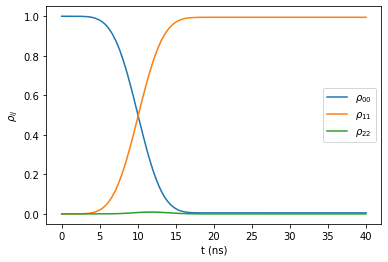

P(|0>)=0.005225427406052468, P(|1>) = 0.9947715822874175, P(|2>) = 2.9903065293685227e-06


In [34]:
t = np.linspace(0, simulation_option['simulation_time'], simulation_option['simulation_step'])

# Select which result you want to see
result = result_list[0]

# Plot
%matplotlib inline

plt.plot(t,qs.expect(result.states, state_0 * qs.dag(state_0)), label=r'$\rho_{00}$');
plt.plot(t,qs.expect(result.states, state_1 * qs.dag(state_1)), label=r'$\rho_{11}$');
plt.plot(t,qs.expect(result.states, state_2 * qs.dag(state_2)), label=r'$\rho_{22}$');
plt.ylabel(r"$\rho_{ij}$")
plt.xlabel("t (ns)")
plt.legend()
plt.show()

ss = simulation_option["simulation_step"]-1
print('P(|0>)={}, P(|1>) = {}, P(|2>) = {}'.format(qs.expect(result.states, state_0 * qs.dag(state_0))[ss-1], qs.expect(result.states, state_1 * qs.dag(state_1))[ss-1], qs.expect(result.states, state_2 * qs.dag(state_2))[ss-1]))

### Frequency scan

In [35]:
pulse_sequence_scan = pulse_sequence.copy()
result_collection = []
freq_scan = np.linspace(6.29, 6.31, 100)
for i, f in enumerate(freq_scan):
    pulse_sequence_scan[0]['freq'] = f
    result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence_scan)
    result_collection.append(result_list)

Maximum probability P(|1>) = 0.9999421455316219, corresponding frequency = 6.3029292929


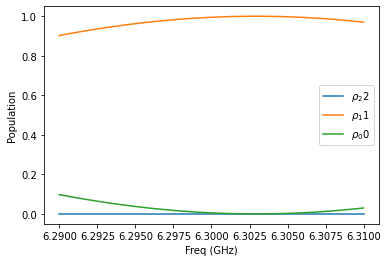

In [36]:
p0_max, p1_max, p2_max = [], [], []

for k, DRAG_detuning in enumerate(freq_scan):
    p2_max.append(qs.expect(result_collection[k][0].states, state_2 * qs.dag(state_2))[-1])
    p1_max.append(qs.expect(result_collection[k][0].states, state_1 * qs.dag(state_1))[-1])
    p0_max.append(qs.expect(result_collection[k][0].states, state_0 * qs.dag(state_0))[-1])
plt.plot(freq_scan, p2_max, label=r'$\rho_{22}$')
plt.plot(freq_scan, p1_max, label=r'$\rho_{11}$')
plt.plot(freq_scan, p0_max, label=r'$\rho_{00}$')
plt.legend()
plt.xlabel('Freq (GHz)')
plt.ylabel('Population')

max_index = np.argmax(p1_max)
print(f"Maximum probability P(|1>) = {p1_max[max_index]}, corresponding frequency = {np.round(freq_scan[max_index], 10)}")

### Gate time scan
#### Scan t_plateau


In [ ]:
plateau_scan = np.linspace(0,2,100)
pulse_sequence_scan = pulse_sequence.copy()
result_collection = []
for i, t_p in enumerate(plateau_scan):
    pulse_sequence_scan[0]['t_plateau'] = t_p
    result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence_scan)
    result_collection.append(result_list)

Maximum probability P(|1>) = 0.969067143789599, corresponding t_plateau = 0.0


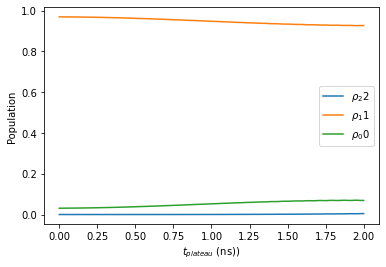

In [ ]:
p0_max, p1_max, p2_max = [], [], []

for k, DRAG_detuning in enumerate(plateau_scan):
    p2_max.append(qs.expect(result_collection[k][0].states, state_2 * qs.dag(state_2))[-1])
    p1_max.append(qs.expect(result_collection[k][0].states, state_1 * qs.dag(state_1))[-1])
    p0_max.append(qs.expect(result_collection[k][0].states, state_0 * qs.dag(state_0))[-1])
plt.plot(plateau_scan, p2_max, label=r'$\rho_{22}$')
plt.plot(plateau_scan, p1_max, label=r'$\rho_{11}$')
plt.plot(plateau_scan, p0_max, label=r'$\rho_{00}$')
plt.legend()
plt.xlabel(r'$t_{plateau}$ (ns))')
plt.ylabel('Population')

max_index = np.argmax(p1_max)
print(f"Maximum probability P(|1>) = {p1_max[max_index]}, corresponding t_plateau = {np.round(plateau_scan[max_index], 10)}")

#### Scan t_width

In [42]:
width_scan = np.linspace(15,25, 500)
pulse_sequence_scan = pulse_sequence.copy()
result_collection = []
for i, t_w in enumerate(width_scan):
    pulse_sequence_scan[0]['t_width'] = t_w
    result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence_scan)
    result_collection.append(result_list)

Maximum probability P(|1>) = 0.9947798296259531, corresponding t_width = 20.0300601202


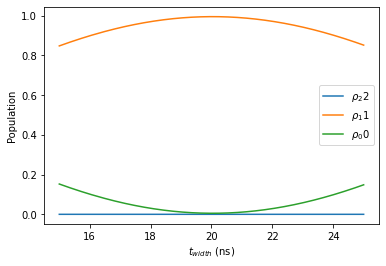

In [43]:
p0_max, p1_max, p2_max = [], [], []

for k, DRAG_detuning in enumerate(width_scan):
    p2_max.append(qs.expect(result_collection[k][0].states, state_2 * qs.dag(state_2))[-1])
    p1_max.append(qs.expect(result_collection[k][0].states, state_1 * qs.dag(state_1))[-1])
    p0_max.append(qs.expect(result_collection[k][0].states, state_0 * qs.dag(state_0))[-1])
plt.plot(width_scan, p2_max, label=r'$\rho_{22}$')
plt.plot(width_scan, p1_max, label=r'$\rho_{11}$')
plt.plot(width_scan, p0_max, label=r'$\rho_{00}$')
plt.legend()
plt.xlabel(r'$t_{width}$ (ns)')
plt.ylabel('Population')

max_index = np.argmax(p1_max)
print(f"Maximum probability P(|1>) = {p1_max[max_index]}, corresponding t_width = {np.round(width_scan[max_index], 10)}")

### Amplitude scan

In [44]:
pulse_sequence_scan = pulse_sequence.copy()
amp_scan = np.linspace(0,0.1, 100)
result_collection = []
for i, amp in enumerate(amp_scan):
    pulse_sequence_scan[0]['amplitude'] = amp
    result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence_scan)
    result_collection.append(result_list)

Maximum probability P(|1>) = 0.9945401983539922, corresponding amplitude = 0.0494949495


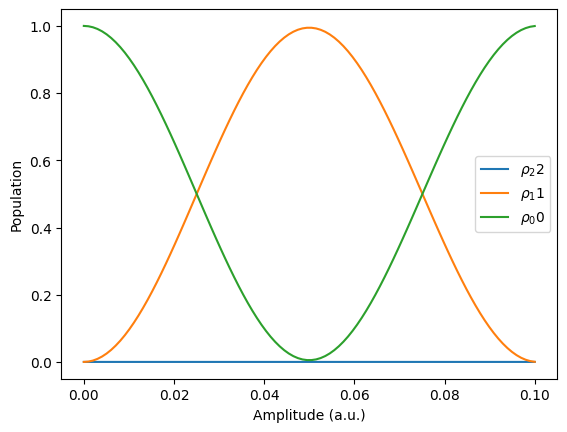

In [45]:
p0_max, p1_max, p2_max = [], [], []

for k, DRAG_detuning in enumerate(amp_scan):
    p2_max.append(qs.expect(result_collection[k][0].states, state_2 * qs.dag(state_2))[-1])
    p1_max.append(qs.expect(result_collection[k][0].states, state_1 * qs.dag(state_1))[-1])
    p0_max.append(qs.expect(result_collection[k][0].states, state_0 * qs.dag(state_0))[-1])
plt.plot(amp_scan, p2_max, label=r'$\rho_{22}$')
plt.plot(amp_scan, p1_max, label=r'$\rho_{11}$')
plt.plot(amp_scan, p0_max, label=r'$\rho_{00}$')
plt.legend()
plt.xlabel('Amplitude (a.u.)')
plt.ylabel('Population')

max_index = np.argmax(p1_max)
print(f"Maximum probability P(|1>) = {p1_max[max_index]}, corresponding amplitude = {np.round(amp_scan[max_index], 10)}")